## Supervised models
This notebook is intended for giving an introduction the ML supervised models that can be used for Covid detection.

For this notebook to find the new modules created for this project, we need to set its path to be in the root directory.

In [1]:
# Auto reload modules
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

<img src="../images/Supervised_Models.png" width="800"/>

## Loading packages and dependencies

In [3]:
from src.preprocessing.image_augmentor import generate_augmented_images
from src.models.build_model import train_advanced_supervised_model, evaluate_model
from src.visualization.visualizer import show_grad_cam_cnn, get_predication_output,show_loss_accuracy_report, show_confusion_matrix_report

# Path to the raw data and preprocessed data
raw_data_dir = '../data/raw/dataset/masked_images'
store_images_dir = '../reports/images/grad_cam'
IMG_SIZE = 256  # Resize images to IMG_SIZExIMG_SIZE pixels
batch_size = 32

## Extracting features from images

In [4]:
train_data, val_data, class_weight_dict = generate_augmented_images(raw_data_dir, (IMG_SIZE, IMG_SIZE), batch_size)

Found 16933 images belonging to 4 classes.
Found 4232 images belonging to 4 classes.
Computed Class Weights:{0: 1.4632734185966125, 1: 0.8800935550935551, 2: 0.5191623742948246, 3: 3.9342472118959106} labels: {'COVID': 0, 'Lung_Opacity': 1, 'NORMAL': 2, 'Viral Pneumonia': 3}


## Training and evaluating models

#### Trying 4 convolutional layers

In [5]:
# Train the model
cnn_model_4l, cnn_history_4l = train_advanced_supervised_model(train_data, val_data, IMG_SIZE, 50, 4, class_weight_dict, filter_layers=[32, 64], conv2d_layers=2,dense_layers=[32], augmentation=True, model_type='CNN', classification_type='categorical')

2025-04-17 15:55:31.019391: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2025-04-17 15:55:31.019422: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 128.00 GB
2025-04-17 15:55:31.019425: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 48.00 GB
2025-04-17 15:55:31.019449: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-17 15:55:31.019478: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation              │ (None, 256, 256, 1)    │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 256, 256, 1)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast                 │ (None, 256, 256, 1)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     2,097,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,163,076 (8.25 MB)

 Trainable params: 2,162,692 (8.25 MB)

 Non-trainable params: 384 (1.50 KB)

/Users/rehabaam/codes/python/datascientest/project/ds_covid19_project/.ds_covid19/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


2025-04-17 15:55:31.874248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


530/530 ━━━━━━━━━━━━━━━━━━━━ 37s 66ms/step - accuracy: 0.2909 - loss: 8.0475 - val_accuracy: 0.4820 - val_loss: 5.3585 - learning_rate: 1.0000e-04
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 35s 65ms/step - accuracy: 0.3179 - loss: 8.7593 - val_accuracy: 0.4523 - val_loss: 3.4441 - learning_rate: 1.0000e-04
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 35s 67ms/step - accuracy: 0.3342 - loss: 11.0143 - val_accuracy: 0.4676 - val_loss: 4.5145 - learning_rate: 1.0000e-04
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 35s 66ms/step - accuracy: 0.3403 - loss: 12.3713 - val_accuracy: 0.4369 - val_loss: 7.8142 - learning_rate: 1.0000e-04
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 35s 66ms/step - accuracy: 0.3393 - loss: 15.2253 - val_accuracy: 0.2372 - val_loss: 8.8502 - learning_rate: 1.0000e-04
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 35s 66ms/step - accuracy: 0.3524 - loss: 14.9737 - val_accuracy: 0.2460 - val_loss: 22.0972 - learning_rate: 1.0000e-04
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - acc

In [6]:
cnn_train_loss_4l, cnn_train_acc_4l = cnn_history_4l.history['loss'][-1], cnn_history_4l.history['accuracy'][-1]
print(f"Train Accuracy: {cnn_train_acc_4l:.4f}, Train Loss: {cnn_train_loss_4l:.4f}")

cnn_test_loss_4l, cnn_test_acc_4l = evaluate_model("Multi-label classification [Normal, COVID, Viral Pneumonia, Lung_Opacity] for masked images", cnn_model_4l, val_data, _, model_type="CNN", classification_type="multiclass", history=cnn_history_4l)
print(f"Test Accuracy: {cnn_test_acc_4l:.4f}, Test Loss: {cnn_test_loss_4l:.4f}")

Train Accuracy: 0.3655, Train Loss: 17.5779
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4470 - loss: 3.4373
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Registered model 'tensorflow-CNN-multiclass' already exists. Creating a new version of this model...
2025/04/17 15:59:53 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tensorflow-CNN-multiclass, version 8


🏃 View run CNN-multiclass at: http://localhost:8080/#/experiments/256036775927951482/runs/389ee5fad1d440cf9efea8245c528dd2
🧪 View experiment at: http://localhost:8080/#/experiments/256036775927951482
Test Accuracy: 0.4523, Test Loss: 3.4441


Created version '8' of model 'tensorflow-CNN-multiclass'.


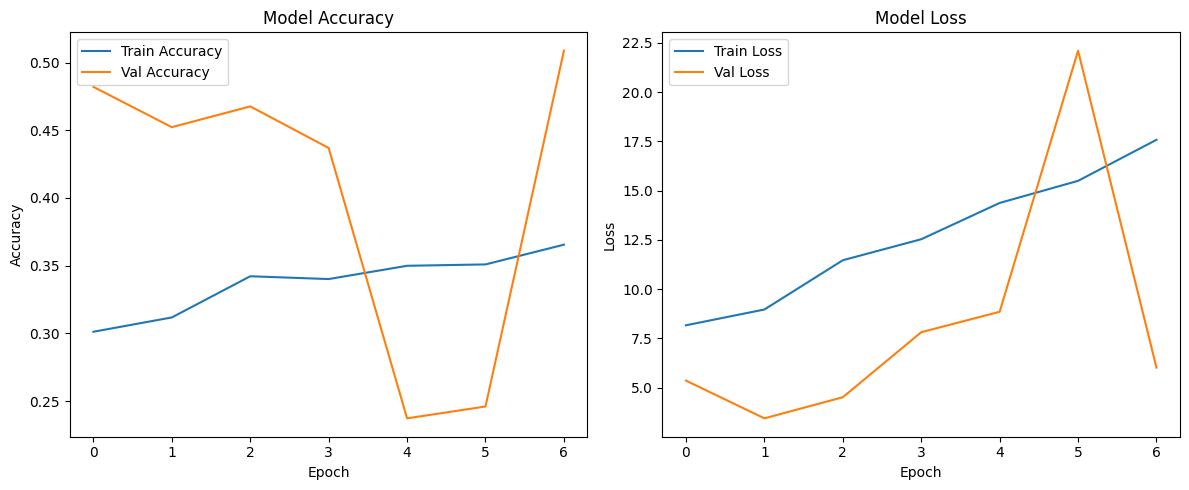

In [7]:
show_loss_accuracy_report(cnn_history_4l)

In [8]:
show_confusion_matrix_report(cnn_model_4l, val_data)

133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
[[234 316 166   7]
 [381 507 301  13]
 [625 910 485  18]
 [ 72 122  70   5]]
              precision    recall  f1-score   support

           0       0.18      0.32      0.23       723
           1       0.27      0.42      0.33      1202
           2       0.47      0.24      0.32      2038
           3       0.12      0.02      0.03       269

    accuracy                           0.29      4232
   macro avg       0.26      0.25      0.23      4232
weighted avg       0.34      0.29      0.29      4232



In [9]:
class_names = list(val_data.class_indices.keys())
images, labels = next(val_data)

Model interpretation with GradCam for random validation images is saved to `reports/images/grad_cam`.

In [10]:
show_grad_cam_cnn(images[:4], cnn_model_4l, class_names, labels, save_dir=store_images_dir, image_name="3.8_cnn_4_layers", save_image=True)

Show prediction results for random images.

In [11]:
display(get_predication_output(images[:4], cnn_model_4l, class_names, labels).head(10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


,image,confidence,predicted_class,actual_class
0,0,99.828404,NORMAL,Lung_Opacity
1,1,98.237270,Lung_Opacity,NORMAL
2,2,95.825714,NORMAL,COVID
3,3,99.997461,NORMAL,NORMAL


#### Trying 8 convolutional layers

In [12]:
cnn_model_8l, cnn_history_8l = train_advanced_supervised_model(train_data, val_data, IMG_SIZE, 50, 4, class_weight_dict, filter_layers=[32, 64, 128, 256], conv2d_layers=2, dense_layers=[128, 32], augmentation=True, model_type='CNN', classification_type='categorical')

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation_1            │ (None, 256, 256, 1)    │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_1 (RandomFlip)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 256, 256, 1)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_1               │ (None, 256, 256, 1)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_1 (Resizing)           │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 128)    │       147,58

 Total params: 3,277,060 (12.50 MB)

 Trainable params: 3,275,140 (12.49 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 59s 103ms/step - accuracy: 0.2774 - loss: 10.4027 - val_accuracy: 0.4816 - val_loss: 12.4686 - learning_rate: 1.0000e-04
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 52s 98ms/step - accuracy: 0.3390 - loss: 11.7451 - val_accuracy: 0.4922 - val_loss: 7.3221 - learning_rate: 1.0000e-04
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 54s 101ms/step - accuracy: 0.4016 - loss: 14.9301 - val_accuracy: 0.5577 - val_loss: 7.2742 - learning_rate: 1.0000e-04
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 52s 98ms/step - accuracy: 0.4352 - loss: 15.3253 - val_accuracy: 0.5345 - val_loss: 10.7329 - learning_rate: 1.0000e-04
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 55s 103ms/step - accuracy: 0.4673 - loss: 14.9144 - val_accuracy: 0.6482 - val_loss: 6.5188 - learning_rate: 1.0000e-04
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 53s 99ms/step - accuracy: 0.4928 - loss: 14.3539 - val_accuracy: 0.6560 - val_loss: 7.8763 - learning_rate: 1.0000e-04
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 5

In [13]:
cnn_train_loss_8l, cnn_train_acc_8l = cnn_history_8l.history['loss'][-1], cnn_history_8l.history['accuracy'][-1]
print(f"Train Accuracy: {cnn_train_acc_8l:.4f}, Train Loss: {cnn_train_loss_8l:.4f}")

cnn_test_loss_8l, cnn_test_acc_8l = evaluate_model("Multi-label classification [Normal, COVID, Viral Pneumonia, Lung_Opacity] for masked images", cnn_model_8l, val_data, _, model_type="CNN", classification_type="multiclass", history=cnn_history_8l)
print(f"Test Accuracy: {cnn_test_acc_8l:.4f}, Test Loss: {cnn_test_loss_8l:.4f}")

Train Accuracy: 0.5757, Train Loss: 12.7948
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6533 - loss: 6.5053
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Registered model 'tensorflow-CNN-multiclass' already exists. Creating a new version of this model...
2025/04/17 16:10:54 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tensorflow-CNN-multiclass, version 9


🏃 View run CNN-multiclass at: http://localhost:8080/#/experiments/256036775927951482/runs/771ac78dbe054ab9aba4e8876337dcff
🧪 View experiment at: http://localhost:8080/#/experiments/256036775927951482
Test Accuracy: 0.6626, Test Loss: 6.3621


Created version '9' of model 'tensorflow-CNN-multiclass'.


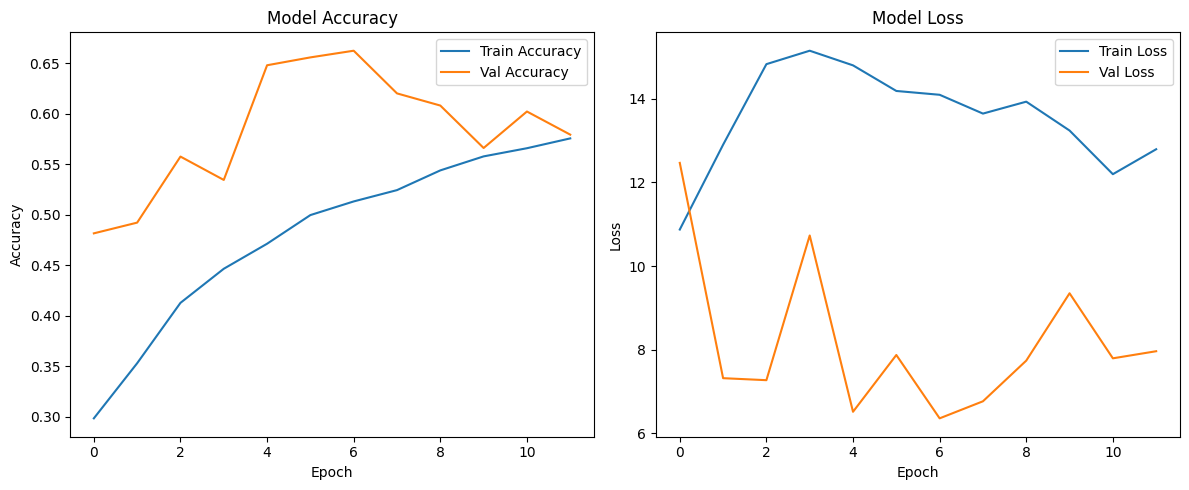

In [14]:
show_loss_accuracy_report(cnn_history_8l)

In [15]:
show_confusion_matrix_report(cnn_model_8l, val_data)

133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
[[204 202 233  84]
 [342 350 346 164]
 [569 537 662 270]
 [ 79  55  99  36]]
              precision    recall  f1-score   support

           0       0.17      0.28      0.21       723
           1       0.31      0.29      0.30      1202
           2       0.49      0.32      0.39      2038
           3       0.06      0.13      0.09       269

    accuracy                           0.30      4232
   macro avg       0.26      0.26      0.25      4232
weighted avg       0.36      0.30      0.32      4232



In [ ]:
show_grad_cam_cnn(images[:4], cnn_model_8l, class_names, labels, save_dir=store_images_dir, image_name="3.8_cnn_8_layers", save_image=True)

In [17]:
display(get_predication_output(images[:4], cnn_model_8l, class_names, labels).head(10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


,image,confidence,predicted_class,actual_class
0,0,100.000000,NORMAL,Lung_Opacity
1,1,99.922109,COVID,NORMAL
2,2,99.999905,COVID,COVID
3,3,100.000000,NORMAL,NORMAL


#### Trying 12 convolutional layers

In [18]:
cnn_model_12l, cnn_history_12l = train_advanced_supervised_model(train_data, val_data, IMG_SIZE, 50, 4, class_weight_dict, filter_layers=[32, 64, 128, 256], conv2d_layers=3, dense_layers=[128, 32], augmentation=True, model_type='CNN', classification_type='categorical')

Model: "functional_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation_2            │ (None, 256, 256, 1)    │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_2 (RandomZoom)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_2 (RandomFlip)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_2               │ (None, 256, 256, 1)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_2               │ (None, 256, 256, 1)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_2 (Resizing)           │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 64, 64, 64)     │           25

 Total params: 4,062,820 (15.50 MB)

 Trainable params: 4,059,940 (15.49 MB)

 Non-trainable params: 2,880 (11.25 KB)

Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 73s 127ms/step - accuracy: 0.2998 - loss: 12.9338 - val_accuracy: 0.3332 - val_loss: 2.0102 - learning_rate: 1.0000e-04
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 67s 126ms/step - accuracy: 0.3677 - loss: 18.4045 - val_accuracy: 0.4199 - val_loss: 15.1772 - learning_rate: 1.0000e-04
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 69s 130ms/step - accuracy: 0.3865 - loss: 20.4880 - val_accuracy: 0.5418 - val_loss: 10.1994 - learning_rate: 1.0000e-04
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 74s 140ms/step - accuracy: 0.4180 - loss: 23.9414 - val_accuracy: 0.5380 - val_loss: 14.3644 - learning_rate: 1.0000e-04
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 78s 147ms/step - accuracy: 0.4380 - loss: 26.0538 - val_accuracy: 0.1848 - val_loss: 158.2532 - learning_rate: 1.0000e-04
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.4374 - loss: 29.1165
Epoch 6: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
530/530 ━━━━━━━━━━━━━━━━━━━━ 

In [19]:
cnn_train_loss_12l, cnn_train_acc_12l = cnn_history_12l.history['loss'][-1], cnn_history_12l.history['accuracy'][-1]
print(f"Train Accuracy: {cnn_train_acc_12l:.4f}, Train Loss: {cnn_train_loss_12l:.4f}")

cnn_test_loss_12l, cnn_test_acc_12l = evaluate_model("Multi-label classification [Normal, COVID, Viral Pneumonia, Lung_Opacity] for masked images", cnn_model_12l, val_data, _, model_type="CNN", classification_type="multiclass", history=cnn_history_12l)
print(f"Test Accuracy: {cnn_test_acc_12l:.4f}, Test Loss: {cnn_test_loss_12l:.4f}")

Train Accuracy: 0.4386, Train Loss: 31.5135
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3297 - loss: 2.0498
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


/Users/rehabaam/codes/python/datascientest/project/ds_covid19_project/.ds_covid19/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


Registered model 'tensorflow-CNN-multiclass' already exists. Creating a new version of this model...
2025/04/17 16:18:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tensorflow-CNN-multiclass, version 10


🏃 View run CNN-multiclass at: http://localhost:8080/#/experiments/256036775927951482/runs/aa9a38ce12d64bd3af32532158eb2a35
🧪 View experiment at: http://localhost:8080/#/experiments/256036775927951482
Test Accuracy: 0.3332, Test Loss: 2.0102


Created version '10' of model 'tensorflow-CNN-multiclass'.


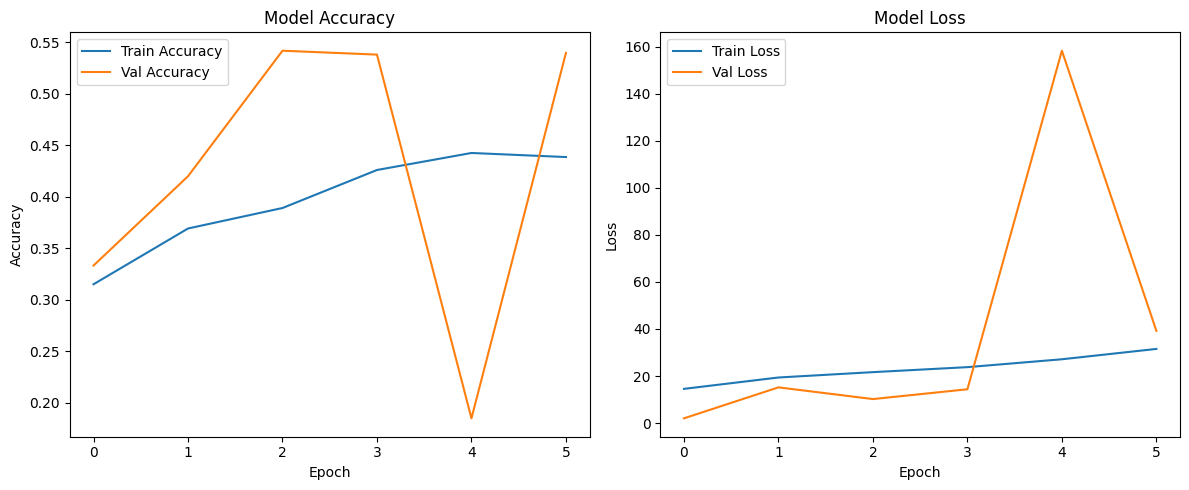

In [20]:
show_loss_accuracy_report(cnn_history_12l)

In [21]:
show_confusion_matrix_report(cnn_model_12l, val_data)

133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step
[[ 383   24  316    0]
 [ 614   47  541    0]
 [1027   77  934    0]
 [ 134    9  126    0]]
              precision    recall  f1-score   support

           0       0.18      0.53      0.27       723
           1       0.30      0.04      0.07      1202
           2       0.49      0.46      0.47      2038
           3       0.00      0.00      0.00       269

    accuracy                           0.32      4232
   macro avg       0.24      0.26      0.20      4232
weighted avg       0.35      0.32      0.29      4232



/Users/rehabaam/codes/python/datascientest/project/ds_covid19_project/.ds_covid19/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rehabaam/codes/python/datascientest/project/ds_covid19_project/.ds_covid19/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rehabaam/codes/python/datascientest/project/ds_covid19_project/.ds_covid19/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

In [22]:
show_grad_cam_cnn(images[:4], cnn_model_12l, class_names, labels, save_dir=store_images_dir, image_name="3.8_cnn_12_layers", save_image=True)

In [23]:
display(get_predication_output(images[:4], cnn_model_12l, class_names, labels).head(10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


,image,confidence,predicted_class,actual_class
0,0,81.781620,NORMAL,Lung_Opacity
1,1,60.229462,COVID,NORMAL
2,2,78.355241,Lung_Opacity,COVID
3,3,85.880625,NORMAL,NORMAL


#### Trying 16 convolutional layers

In [24]:
cnn_model_16l, cnn_history_16l = train_advanced_supervised_model(train_data, val_data, IMG_SIZE, 50, 4, class_weight_dict, filter_layers=[32, 64, 128, 256], conv2d_layers=4, dense_layers=[128, 32],  augmentation=True, model_type='CNN', classification_type='categorical')

Model: "functional_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation_3            │ (None, 256, 256, 1)    │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_3 (RandomZoom)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_3 (RandomFlip)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_3               │ (None, 256, 256, 1)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_3               │ (None, 256, 256, 1)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_3 (Resizing)           │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 64, 64, 64)     │           25

 Total params: 4,848,580 (18.50 MB)

 Trainable params: 4,844,740 (18.48 MB)

 Non-trainable params: 3,840 (15.00 KB)

Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 98s 172ms/step - accuracy: 0.2448 - loss: 14.4796 - val_accuracy: 0.4820 - val_loss: 20.4022 - learning_rate: 1.0000e-04
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 83s 157ms/step - accuracy: 0.3727 - loss: 12.6129 - val_accuracy: 0.3840 - val_loss: 12.1664 - learning_rate: 1.0000e-04
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 86s 162ms/step - accuracy: 0.4067 - loss: 13.0171 - val_accuracy: 0.5241 - val_loss: 12.5924 - learning_rate: 1.0000e-04
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 88s 166ms/step - accuracy: 0.4523 - loss: 13.5636 - val_accuracy: 0.4251 - val_loss: 32.2951 - learning_rate: 1.0000e-04
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 92s 174ms/step - accuracy: 0.4619 - loss: 16.0572 - val_accuracy: 0.6411 - val_loss: 8.8011 - learning_rate: 1.0000e-04
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 88s 167ms/step - accuracy: 0.4724 - loss: 16.0108 - val_accuracy: 0.4731 - val_loss: 40.5405 - learning_rate: 1.0000e-04
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━

In [25]:
cnn_train_loss_16l, cnn_train_acc_16l = cnn_history_16l.history['loss'][-1], cnn_history_16l.history['accuracy'][-1]
print(f"Train Accuracy: {cnn_train_acc_16l:.4f}, Train Loss: {cnn_train_loss_16l:.4f}")

cnn_test_loss_16l, cnn_test_acc_16l = evaluate_model("Multi-label classification [Normal, COVID, Viral Pneumonia, Lung_Opacity] for masked images", cnn_model_16l, val_data, _, model_type="CNN", classification_type="multiclass", history=cnn_history_16l)
print(f"Test Accuracy: {cnn_test_acc_16l:.4f}, Test Loss: {cnn_test_loss_16l:.4f}")

Train Accuracy: 0.5346, Train Loss: 18.7490
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6460 - loss: 8.7669
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Registered model 'tensorflow-CNN-multiclass' already exists. Creating a new version of this model...
2025/04/17 16:33:47 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tensorflow-CNN-multiclass, version 11


🏃 View run CNN-multiclass at: http://localhost:8080/#/experiments/256036775927951482/runs/1e35af07253e440f9e70080d13fb0a58
🧪 View experiment at: http://localhost:8080/#/experiments/256036775927951482
Test Accuracy: 0.6411, Test Loss: 8.8011


Created version '11' of model 'tensorflow-CNN-multiclass'.


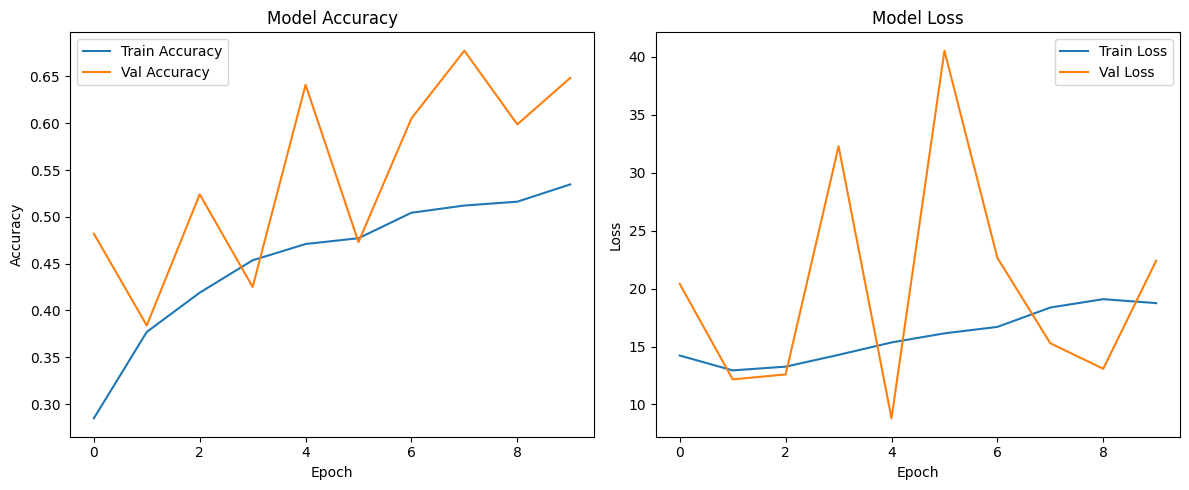

In [26]:
show_loss_accuracy_report(cnn_history_16l)

In [27]:
show_confusion_matrix_report(cnn_model_16l, val_data)

133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step
[[ 152  125  341  105]
 [ 235  231  576  160]
 [ 381  369 1019  269]
 [  58   47  134   30]]
              precision    recall  f1-score   support

           0       0.18      0.21      0.20       723
           1       0.30      0.19      0.23      1202
           2       0.49      0.50      0.50      2038
           3       0.05      0.11      0.07       269

    accuracy                           0.34      4232
   macro avg       0.26      0.25      0.25      4232
weighted avg       0.36      0.34      0.34      4232



In [28]:
show_grad_cam_cnn(images[:4], cnn_model_16l, class_names, labels, save_dir=store_images_dir, image_name="3.8_cnn_16_layers", save_image=True)

In [29]:
display(get_predication_output(images[:4], cnn_model_16l, class_names, labels).head(10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


,image,confidence,predicted_class,actual_class
0,0,100.000000,NORMAL,Lung_Opacity
1,1,100.000000,NORMAL,NORMAL
2,2,84.115165,Lung_Opacity,COVID
3,3,100.000000,NORMAL,NORMAL
